In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Linear regression

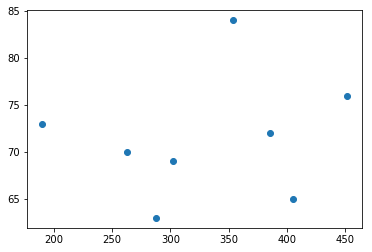

loss: [672545.63]
loss: [482903.0]
loss: [475800.97]
loss: [470492.38]
loss: [466524.13]
loss: [463557.84]
loss: [461340.41]
loss: [459682.78]
loss: [458443.47]
loss: [457516.94]
loss: [456824.16]
loss: [456306.13]
loss: [455918.66]
loss: [455628.75]
loss: [455411.91]
loss: [455249.56]
loss: [455127.94]
loss: [455036.81]
loss: [454968.5]
loss: [454917.16]
loss: [454878.53]
loss: [454849.44]
loss: [454827.44]
loss: [454810.75]
loss: [454798.09]
loss: [454788.34]
loss: [454780.81]
loss: [454774.97]
loss: [454770.38]
loss: [454766.66]
loss: [454763.69]
loss: [454761.19]
loss: [454759.06]
loss: [454757.28]
loss: [454755.72]
loss: [454754.28]
loss: [454752.97]
loss: [454751.78]
loss: [454750.59]
loss: [454749.53]
loss: [454748.47]
loss: [454747.47]
loss: [454746.41]
loss: [454745.41]
loss: [454744.41]
loss: [454743.44]
loss: [454742.53]
loss: [454741.59]
loss: [454740.63]
loss: [454739.66]
loss: [454738.69]
loss: [454737.78]
loss: [454736.81]
loss: [454735.81]
loss: [454734.88]
loss: [45473

In [33]:
tf.reset_default_graph()

# initialize model parameters
W = tf.Variable(tf.zeros([2, 1]), name="weights")
#W = tf.Variable(tf.zeros([5, 1]), name="weights")
b = tf.Variable(0., name="bias")
lmbda = tf.constant(0.5)

def inference(X):
    return tf.matmul(X, W) + b

def loss(X, Y, sess):
    Y_predicted = inference(X)
    return tf.add(
        tf.reduce_sum(tf.squared_difference(Y, Y_predicted)),
        tf.multiply(lmbda, tf.tensordot(W, W, [0, 0])[0,0])
    )
    #return tf.reduce_sum(tf.squared_difference(Y, Y_predicted))

def inputs():
    weight_age = [[84, 46], [73, 20], [65, 52], [70, 30], [76, 57], [69, 25], [63, 28], [72, 36]]
    #weight_age = np.array([ [x[0], x[1], x[0]**2, x[1]**2, x[0]*x[1] ] for x in weight_age])
    blood_fat_content = [354, 190, 405, 263, 451, 302, 288, 385]
    
    return tf.to_float(weight_age), tf.to_float(blood_fat_content)

def train(total_loss):
    learning_rate = 1E-6
    return tf.train.GradientDescentOptimizer(learning_rate).minimize(total_loss)

def evaluate(sess, X, Y):
    #print(sess.run(inference([[80., 25.]]))) # 368
    #print(sess.run(inference([[65., 25.]]))) # 298
    pass
    
    
# launch the graph in a session
with tf.Session() as sess:
    tf.global_variables_initializer().run()
    
    X, Y = inputs()    
    out = sess.run([X, Y])
    weight = [x[0] for x in out[0]]
    age = [x[1] for x in out[0]]
    fats = out[1]
    plt.scatter(fats, weight)
    plt.show()

    total_loss = loss(X, Y, sess)
    train_op = train(total_loss)
    
    coord = tf.train.Coordinator()
    threads = tf.train.start_queue_runners(sess=sess, coord=coord)
    
    # actual training loop
    training_steps = 1000
    for step in range(training_steps):
        sess.run([train_op])
        
        #print("W: %s" % sess.run(W))
        #print("W_norm: %s" % sess.run(tf.norm(W)))
        #print("W_squared: %s" % sess.run(tf.tensordot(W, W, [0, 0])[0,0]))
        
        # for debugging and learning purposes, see how the loss gets decremented thru training steps
        if step % 10 == 0:
            print("loss: %s" % sess.run([total_loss]))
            
    evaluate(sess, X, Y)
    
    coord.request_stop()
    coord.join(threads)
    sess.close()

# Logistic regression for Iris dataset

In [37]:
import csv

# read the Iris data
irisfile = open('iris.data.csv')
reader = csv.reader(irisfile, delimiter=',')
iris_data = [x for x in reader]
irisfile.close()

# take away the header and a straggle '\n'
iris_header = iris_data[0]
iris_data = iris_data[1:-1]

In [51]:
# since there are 4 features and 3 output classes, the weights would have this dimension
W = tf.Variable(tf.zeros([4, 3]), name="weights")
b = tf.Variable(tf.zeros([3]), name="bias")

def combine_inputs(X):
    return tf.matmul(X, W) + b

def inference(X):
    return tf.nn.softmax(combine_inputs(X))

def loss(X, Y):
    return tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(logits=combine_inputs(X), labels=Y))

def inputs(iris_data):
    l_setosa = [ int(row == 'Iris-setosa') for row in [x[-1] for x in iris_data] ]
    l_versicolor = [ int(row == 'Iris-versicolor') for row in [x[-1] for x in iris_data] ]
    l_virginica = [ int(row == 'Iris-virginica') for row in [x[-1] for x in iris_data] ]
    
    label_number = tf.to_int32(np.argmax([l_setosa, l_versicolor, l_virginica], 0))
    features = tf.to_float([ [float(y) for y in x[:-1]] for x in iris_data ])
    
    return features, label_number

def train(total_loss):
    learning_rate = 1E-2
    return tf.train.GradientDescentOptimizer(learning_rate).minimize(total_loss)
    
def evaluate(sess, X, Y):
    predicted = tf.cast(tf.argmax(inference(X), 1), tf.int32)
    
    print(sess.run(tf.reduce_mean(tf.cast(tf.equal(predicted, Y), tf.float32))))
    
    
# launch the graph in a session
with tf.Session() as sess:
    tf.global_variables_initializer().run()
    
    X, Y = inputs(iris_data)
    
    total_loss = loss(X, Y)
    train_op = train(total_loss)
    
    coord = tf.train.Coordinator()
    threads = tf.train.start_queue_runners(sess=sess, coord=coord)
    
    # actual training loop
    training_steps = 10000
    for step in range(training_steps):
        sess.run([train_op])
        
        # for debugging and learning purposes, see how the loss gets decremented thru training steps
        if step % 1000 == 0:
            print("loss: %s" % sess.run([total_loss]))
            
    evaluate(sess, X, Y)
    
    coord.request_stop()
    coord.join(threads)
    sess.close()

loss: [1.0861624]
loss: [0.35761866]
loss: [0.27048293]
loss: [0.22409287]
loss: [0.19499224]
loss: [0.17496037]
loss: [0.16027805]
loss: [0.14901851]
loss: [0.14008458]
loss: [0.13280535]
0.986667


# Convolutions an kernels

In [86]:
import tensorflow as tf

# shape: images x height x width x channels per pixel 
input_batch = tf.constant([
    [ # First image, every pixel has only one channel
        [[0.0], [1.0], [2.0]],
        [[2.0], [3.0], [4.0]]
    ],
    [ # Second image
        [[2.0], [4.0], [6.0]],
        [[6.0], [8.0], [10.0]]
    ]
])

# kernel dimension: height x width x in_channels x out_channels
kernel = tf.constant([
    [[[1.0]], [[1.0]]],
    [[[2.0]], [[2.0]]]
])

# only the middle strides are used; 1 x 2 in the middle means columns get decimated
conv2d = tf.nn.conv2d(input_batch, kernel, strides=[1, 1, 2, 1], padding='SAME')

with tf.Session() as sess:
    tf.global_variables_initializer().run()
    
    print(sess.run(conv2d))

[[[[ 11.]
   [ 10.]]

  [[  5.]
   [  4.]]]


 [[[ 34.]
   [ 26.]]

  [[ 14.]
   [ 10.]]]]


In [3]:
import tensorflow as tf

with tf.Session() as sess:
    features = tf.constant([-0.1, 0.0, 0.1, 0.2])
    print(sess.run([features, tf.nn.dropout(features, keep_prob=0.5)]))

[array([-0.1,  0. ,  0.1,  0.2], dtype=float32), array([-0. ,  0. ,  0.2,  0. ], dtype=float32)]


In [4]:
with tf.Session() as sess:
    layer_input = tf.constant([
        [ [[ 1.]], [[ 2.]], [[ 3.]] ]
    ])
    lrn = tf.nn.local_response_normalization(layer_input)
    print(sess.run([layer_input, lrn]))

[array([[[[ 1.]],

        [[ 2.]],

        [[ 3.]]]], dtype=float32), array([[[[ 0.70710677]],

        [[ 0.89442718]],

        [[ 0.94868326]]]], dtype=float32)]


In [7]:
import math as m
v = [1.0, 2.0, 3.0]
[x / m.sqrt(1 + x**2) for x in v]

[0.7071067811865475, 0.8944271909999159, 0.9486832980505138]

# Word embeddings

In [7]:
import tensorflow as tf
import re
import os
import collections
import numpy as np
import random
import math

TOKEN_REGEX = re.compile(r'[A-Za-z]+|[!?.:,()]')
source_path = 'd:/projects/python/nnanddl/books'
vocabulary_size = 0

words = []
for file in os.listdir(source_path):
    with open(os.path.join(source_path, file), 'rb') as fin:
        for line in fin:
            words_on_line = TOKEN_REGEX.findall(line.decode().strip())
            words.extend(words_on_line)

    
def build_dataset(words):
    """Process raw inputs into a dataset."""
    count = [['UNK', -1]]
    counter = collections.Counter(words)
    count.extend(counter.most_common(len(counter.keys()) - 1))
    global vocabulary_size
    vocabulary_size = len(counter.keys()) - 1
        
    dictionary = dict()
    for word, _ in count:
        dictionary[word] = len(dictionary)
            
    data = list()
    unk_count = 0
    for word in words:
        index = dictionary.get(word, 0)
        if index == 0:  # dictionary['UNK']
            unk_count += 1
        data.append(index)
    count[0][1] = unk_count
    reversed_dictionary = dict(zip(dictionary.values(), dictionary.keys()))
    return data, count, dictionary, reversed_dictionary


data, count, dictionary, reverse_dictionary = build_dataset(words)
print('Most common words (+UNK)', count[:5])
print('Sample data', data[:10], [reverse_dictionary[i] for i in data[:10]])

data_index = 0

def generate_batch(batch_size, num_skips, skip_window):
    global data_index
    assert batch_size % num_skips == 0
    assert num_skips <= 2 * skip_window
    batch = np.ndarray(shape=(batch_size), dtype=np.int32)
    labels = np.ndarray(shape=(batch_size, 1), dtype=np.int32)
    span = 2 * skip_window + 1  # [ skip_window target skip_window ]
    buffer = collections.deque(maxlen=span)
    if data_index + span > len(data):
        data_index = 0
    buffer.extend(data[data_index:data_index + span])
    data_index += span
    for i in range(batch_size // num_skips):
        context_words = [w for w in range(span) if w != skip_window]
        words_to_use = random.sample(context_words, num_skips)
        for j, context_word in enumerate(words_to_use):
            batch[i * num_skips + j] = buffer[skip_window]
            labels[i * num_skips + j, 0] = buffer[context_word]
        if data_index == len(data):
            buffer.extend(data[:span])
            data_index = span
        else:
            buffer.append(data[data_index])
            data_index += 1
    # Backtrack a little bit to avoid skipping words in the end of a batch
    data_index = (data_index + len(data) - span) % len(data)
    return batch, labels

batch, labels = generate_batch(batch_size=8, num_skips=2, skip_window=1)
for i in range(8):
    print(batch[i], reverse_dictionary[batch[i]],
        '->', labels[i, 0], reverse_dictionary[labels[i, 0]])

Most common words (+UNK) [['UNK', 1], (',', 29009), ('the', 16546), ('.', 15331), ('and', 8818)]
Sample data [31, 249, 250, 4732, 6, 1519, 1520, 2120, 1, 39] ['The', 'Project', 'Gutenberg', 'EBook', 'of', 'Ten', 'Years', 'Later', ',', 'by']
249 Project -> 250 Gutenberg
249 Project -> 31 The
250 Gutenberg -> 249 Project
250 Gutenberg -> 4732 EBook
4732 EBook -> 6 of
4732 EBook -> 250 Gutenberg
6 of -> 1519 Ten
6 of -> 4732 EBook


In [9]:
batch_size = 128
embedding_size = 128  # Dimension of the embedding vector.
skip_window = 1       # How many words to consider left and right.
num_skips = 2         # How many times to reuse an input to generate a label.
num_sampled = 64      # Number of negative examples to sample.

# We pick a random validation set to sample nearest neighbors. Here we limit the
# validation samples to the words that have a low numeric ID, which by
# construction are also the most frequent. These 3 variables are used only for
# displaying model accuracy, they don't affect calculation.
valid_size = 16     # Random set of words to evaluate similarity on.
valid_window = 100  # Only pick dev samples in the head of the distribution.
valid_examples = np.random.choice(valid_window, valid_size, replace=False)


graph = tf.Graph()
with graph.as_default():
    # Input data.
    train_inputs = tf.placeholder(tf.int32, shape=[batch_size])
    train_labels = tf.placeholder(tf.int32, shape=[batch_size, 1])
    valid_dataset = tf.constant(valid_examples, dtype=tf.int32)

    # Ops and variables pinned to the CPU because of missing GPU implementation
    # Look up embeddings for inputs.
    embeddings = tf.Variable(
        tf.random_uniform([vocabulary_size, embedding_size], -1.0, 1.0))
    embed = tf.nn.embedding_lookup(embeddings, train_inputs)

    # Construct the variables for the NCE loss
    nce_weights = tf.Variable(
        tf.truncated_normal([vocabulary_size, embedding_size],
                            stddev=1.0 / math.sqrt(embedding_size)))
    nce_biases = tf.Variable(tf.zeros([vocabulary_size]))

    # Compute the average NCE loss for the batch.
    # tf.nce_loss automatically draws a new sample of the negative labels each
    # time we evaluate the loss.
    # Explanation of the meaning of NCE loss:
    #   http://mccormickml.com/2016/04/19/word2vec-tutorial-the-skip-gram-model/
    loss = tf.reduce_mean(
      tf.nn.nce_loss(weights=nce_weights,
                     biases=nce_biases,
                     labels=train_labels,
                     inputs=embed,
                     num_sampled=num_sampled,
                     num_classes=vocabulary_size))
    # Construct the SGD optimizer using a learning rate of 1.0.
    optimizer = tf.train.GradientDescentOptimizer(1.0).minimize(loss)

    # Compute the cosine similarity between minibatch examples and all embeddings.
    norm = tf.sqrt(tf.reduce_sum(tf.square(embeddings), 1, keep_dims=True))
    normalized_embeddings = embeddings / norm
    valid_embeddings = tf.nn.embedding_lookup(
      normalized_embeddings, valid_dataset)
    similarity = tf.matmul(
      valid_embeddings, normalized_embeddings, transpose_b=True)

    # Add variable initializer.
    init = tf.global_variables_initializer()
    
# Step 5: Begin training.
num_steps = 100001

with tf.Session(graph=graph) as session:
    # We must initialize all variables before we use them.
    init.run()
    print('Initialized')

    average_loss = 0
    for step in range(num_steps):
        batch_inputs, batch_labels = generate_batch(
            batch_size, num_skips, skip_window)
        feed_dict = {train_inputs: batch_inputs, train_labels: batch_labels}

        # We perform one update step by evaluating the optimizer op (including it
        # in the list of returned values for session.run()
        _, loss_val = session.run([optimizer, loss], feed_dict=feed_dict)
        average_loss += loss_val

        if step % 2000 == 0:
            if step > 0:
                average_loss /= 2000
            # The average loss is an estimate of the loss over the last 2000 batches.
            print('Average loss at step ', step, ': ', average_loss)
            average_loss = 0

        # Note that this is expensive (~20% slowdown if computed every 500 steps)
        if step % 10000 == 0:
            sim = similarity.eval()
            for i in range(valid_size):
                valid_word = reverse_dictionary[valid_examples[i]]
                top_k = 8  # number of nearest neighbors
                nearest = (-sim[i, :]).argsort()[1:top_k + 1]
                log_str = 'Nearest to %s:' % valid_word
                for k in range(top_k):
                    close_word = reverse_dictionary[nearest[k]]
                    log_str = '%s %s,' % (log_str, close_word)
                print(log_str)
    final_embeddings = normalized_embeddings.eval()


Initialized
Average loss at step  0 :  249.691711426
Nearest to .: sextons, Godwin, idol, incomparable, hawk, curious, rests, cachet,
Nearest to one: mid, damages, mood, Goring, halt, attentive, handwriting, declarations,
Nearest to she: fork, Malta, onwards, fond, mutttered, pink, breathlessly, derogatory,
Nearest to at: priceless, landlords, concerned, license, infected, DAMAGES, assign, mission,
Nearest to your: prisons, dias, copied, appearances, Nearly, blood, intimidate, leaped,
Nearest to M: coachman, amused, Jackdaws, depicting, WE, dee, unaffected, land,
Nearest to to: copyright, wittiest, youth, argue, fretful, thank, swear, scarps,
Nearest to had: Proof, statements, alighted, sheet, acutest, Internal, candidate, unconsciously,
Nearest to What: tourmaline, oaths, impetuosity, thoroughly, NECKLACE, DIRECT, irresistibly, awful,
Nearest to said: bane, reminds, swarming, descendants, professor, regretfully, bar, yawning,
Nearest to very: manifestation, received, spectacula, outbu

Average loss at step  52000 :  3.87652115679
Average loss at step  54000 :  3.89657744205
Average loss at step  56000 :  3.92887654233
Average loss at step  58000 :  3.85994894731
Average loss at step  60000 :  3.86649897933
Nearest to .: ?, bargain, abide, victim, carving, don, Richelieu, burned,
Nearest to one: Astounded, coracles, mid, Dennis, Understand, jewel, One, UNDER,
Nearest to she: he, I, they, George, resorted, Finish, Buckingham, sawed,
Nearest to at: stifled, landlords, collecting, nervously, priceless, pandemonium, shrub, shopman,
Nearest to your: my, his, inscribe, begone, songs, prisons, its, Your,
Nearest to M: coachman, Hearing, Jackdaws, heaven, cadaverous, De, amused, And,
Nearest to to: argue, presentiments, fretful, feels, scarps, Title, hesitate, will,
Nearest to had: has, have, comprehended, having, statements, accomplices, Perhaps, burnt,
Nearest to What: Ah, Who, Did, It, My, Do, Pastoria, beverage,
Nearest to said: replied, cried, exclaimed, added, returned,

In [14]:
# pylint: disable=missing-docstring
# Function to draw visualization of distance between embeddings.
def plot_with_labels(low_dim_embs, labels, filename):
    assert low_dim_embs.shape[0] >= len(labels), 'More labels than embeddings'
    plt.figure(figsize=(18, 18))  # in inches
    for i, label in enumerate(labels):
        x, y = low_dim_embs[i, :]
        plt.scatter(x, y)
        plt.annotate(label,
                 xy=(x, y),
                 xytext=(5, 2),
                 textcoords='offset points',
                 ha='right',
                 va='bottom')

    plt.savefig(filename)

try:
    # pylint: disable=g-import-not-at-top
    from sklearn.manifold import TSNE
    import matplotlib.pyplot as plt

    tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000, method='exact')
    plot_only = 500
    low_dim_embs = tsne.fit_transform(final_embeddings[:plot_only, :])
    labels = [reverse_dictionary[i] for i in range(plot_only)]
    plot_with_labels(low_dim_embs, labels, os.path.join('d:\\', 'tsne.png'))

except ImportError as ex:
    print('Please install sklearn, matplotlib, and scipy to show embeddings.')
    print(ex)